# Arithmetic Operations on Binary Images

This notebook demonstrates fundamental logical/arithmetic operations (Addition, Subtraction, Multiplication, and Division) applied to thresholded binary images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image Loading and Preprocessing
Loading images in grayscale, resizing for compatibility, and applying a global threshold of 128.

In [2]:
img1 = cv2.imread('cameraman.png', 0)
img2 = cv2.imread('coin.png', 0)

if img1 is not None and img2 is not None:
    # Resize img2 to match img1 dimensions
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    threshold = 128
    bin1 = np.where(img1 > threshold, 1, 0)
    bin2 = np.where(img2 > threshold, 1, 0)
else:
    print("Error: Ensure 'cameraman.png' and 'coin.png' exist in the directory.")

### Performing Arithmetic Operations
Applying operations and handling binary constraints (clamping values between 0 and 1).

In [3]:
# Addition (Logical OR style)
add = bin1 + bin2
add[add > 1] = 1  

# Subtraction
sub = bin1 - bin2
sub[sub < 0] = 0 

# Multiplication (Logical AND style)
mul = bin1 * bin2

# Division
div = np.zeros_like(bin1, dtype=float)
div[bin2 != 0] = bin1[bin2 != 0] / bin2[bin2 != 0]

### Visualization of Results

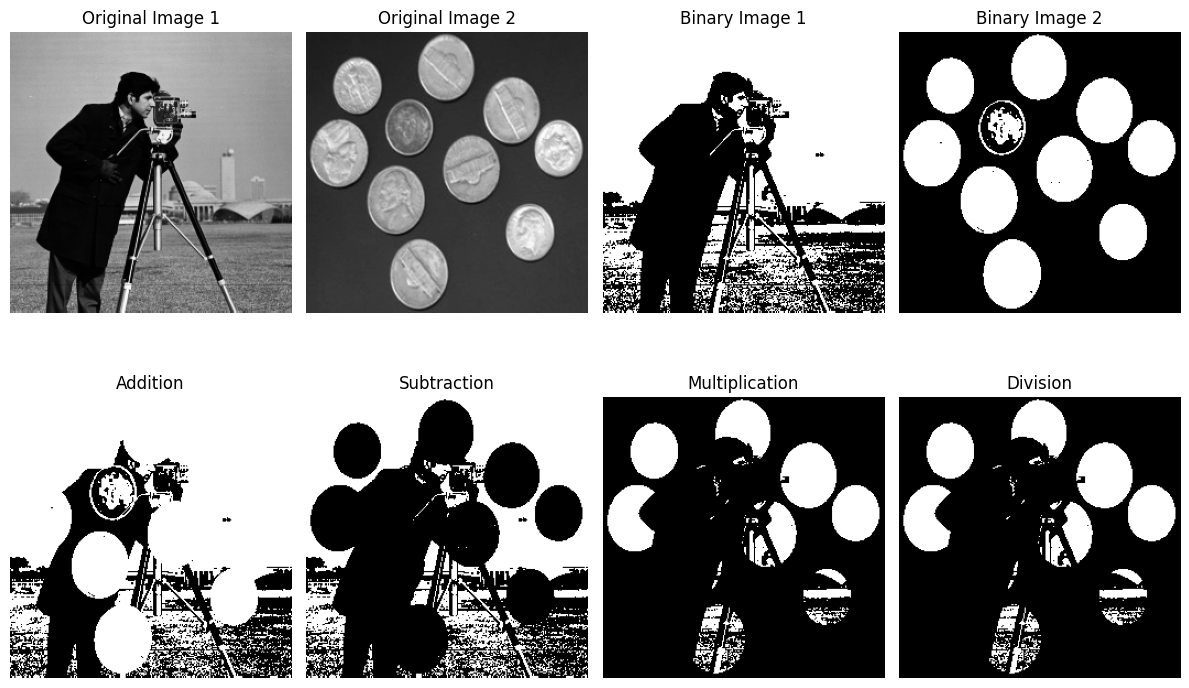

In [4]:
titles = [
    "Original Image 1", "Original Image 2",
    "Binary Image 1", "Binary Image 2",
    "Addition", "Subtraction",
    "Multiplication", "Division"
]

images = [
    img1, img2,
    bin1 * 255, bin2 * 255,
    add * 255, sub * 255,
    mul * 255, div * 255
]

plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()